In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Drug_Consumption.csv'
data = pd.read_csv(file_path)

data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [5]:
# Check for missing or null values in the dataset
missing_values_summary = data.isnull().sum()

# Filter to show only columns with missing values, if any
missing_values_summary = missing_values_summary[missing_values_summary > 0]

missing_values_summary


Series([], dtype: int64)

In [6]:
# Check for missing data and data types
data.info()

# Summarize categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

categorical_summary = {col: data[col].unique() for col in categorical_cols}
categorical_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   AScore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 20  Coke    

{'Age': array(['25-34', '35-44', '18-24', '65+', '45-54', '55-64'], dtype=object),
 'Gender': array(['M', 'F'], dtype=object),
 'Education': array(['Doctorate degree', 'Professional certificate/ diploma',
        'Masters degree', 'Left school at 18 years',
        'Left school at 16 years', 'University degree',
        'Some college or university, no certificate or degree',
        'Left school before 16 years', 'Left school at 17 years'],
       dtype=object),
 'Country': array(['UK', 'Canada', 'USA', 'Other', 'Australia', 'Republic of Ireland',
        'New Zealand'], dtype=object),
 'Ethnicity': array(['White', 'Other', 'Mixed-White/Black', 'Asian',
        'Mixed-White/Asian', 'Black', 'Mixed-Black/Asian'], dtype=object),
 'Alcohol': array(['CL5', 'CL6', 'CL4', 'CL2', 'CL1', 'CL0', 'CL3'], dtype=object),
 'Amphet': array(['CL2', 'CL0', 'CL1', 'CL3', 'CL5', 'CL4', 'CL6'], dtype=object),
 'Amyl': array(['CL2', 'CL0', 'CL1', 'CL3', 'CL5', 'CL4', 'CL6'], dtype=object),
 'Benzos': arra

# Objective 1

In [7]:
# Needed columns
socio_demographics = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
personality_traits = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
illegal_drugs = ['Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Mushrooms', 'VSA']  # Illegal drug columns

# Filter for the columns from above
relevant_columns = socio_demographics + personality_traits + illegal_drugs
data_relevant = data[relevant_columns].copy()

# Transform drug usage columns into binary (0: no use, 1: use)
for drug in illegal_drugs:
    data_relevant[drug] = data_relevant[drug].apply(lambda x: 0 if x == 'CL0' else 1)


data_relevant.head()


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Ecstasy,Heroin,Ketamine,LSD,Meth,Mushrooms,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,1,1,1,0,0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,1,0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,1,0,0,0,0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,0,1,0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0,0,0,0,0


In [8]:

relevant_columns = socio_demographics + personality_traits + illegal_drugs
data_relevant = data[relevant_columns].copy()

for drug in illegal_drugs:
    data_relevant[drug] = data_relevant[drug].apply(lambda x: 0 if x == 'CL0' else 1)

data_relevant.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Ecstasy,Heroin,Ketamine,LSD,Meth,Mushrooms,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,1,1,1,0,0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,1,0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,1,0,0,0,0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,0,1,0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0,0,0,0,0


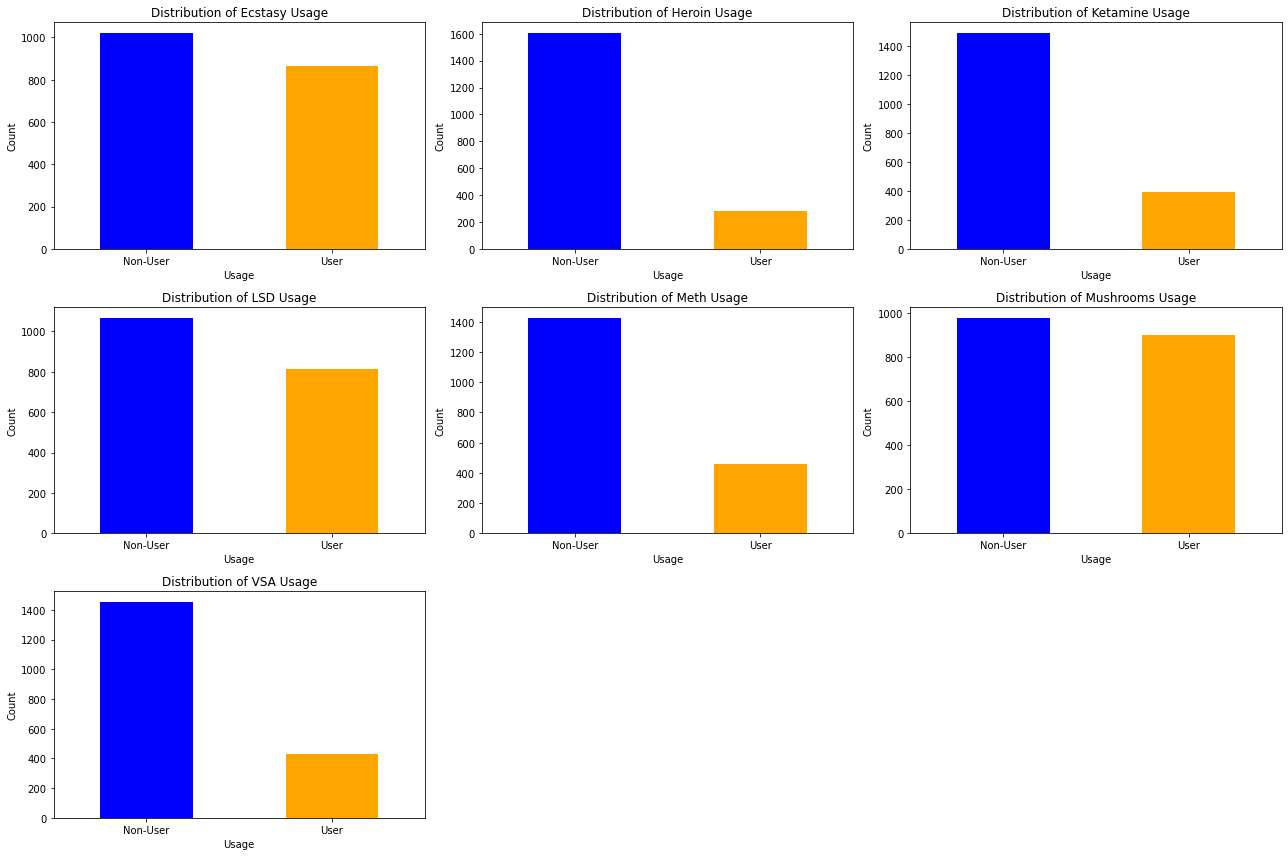

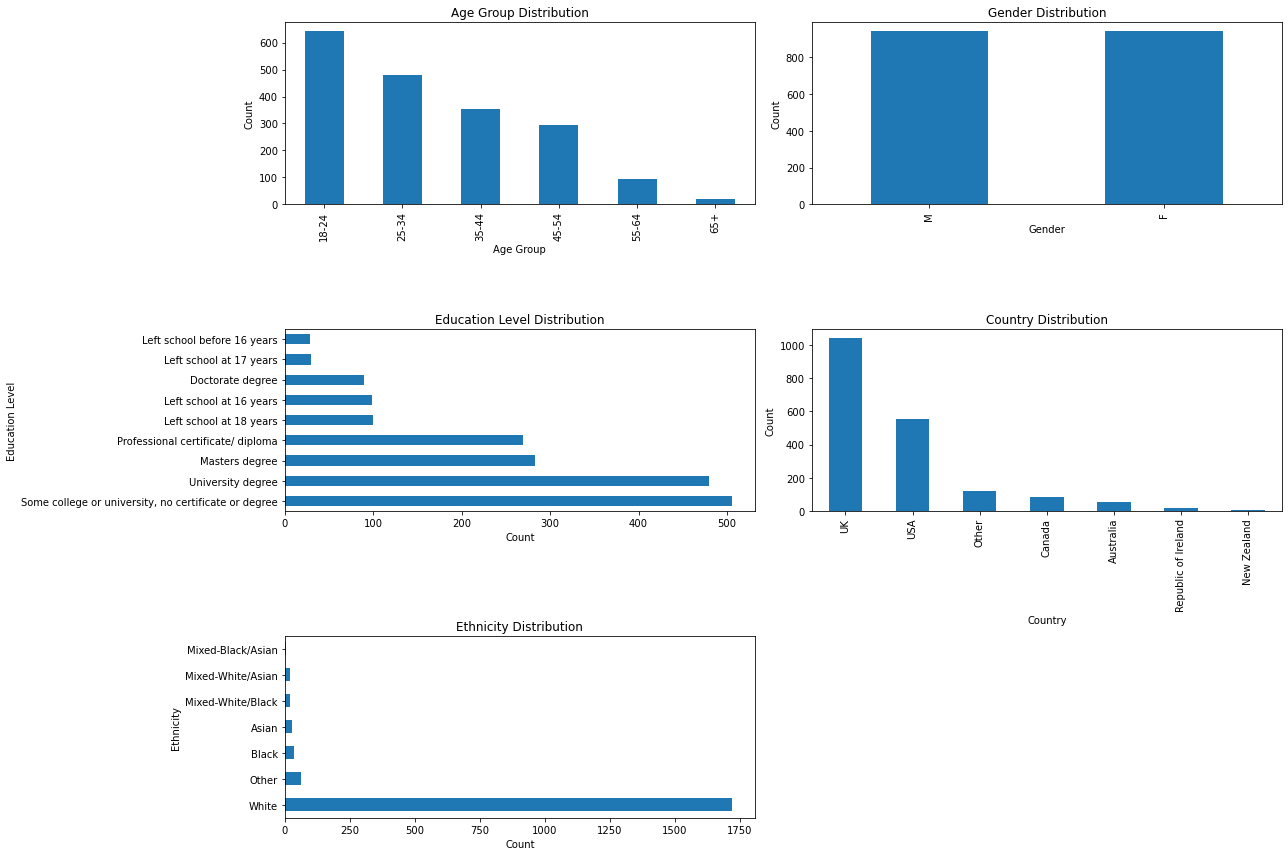

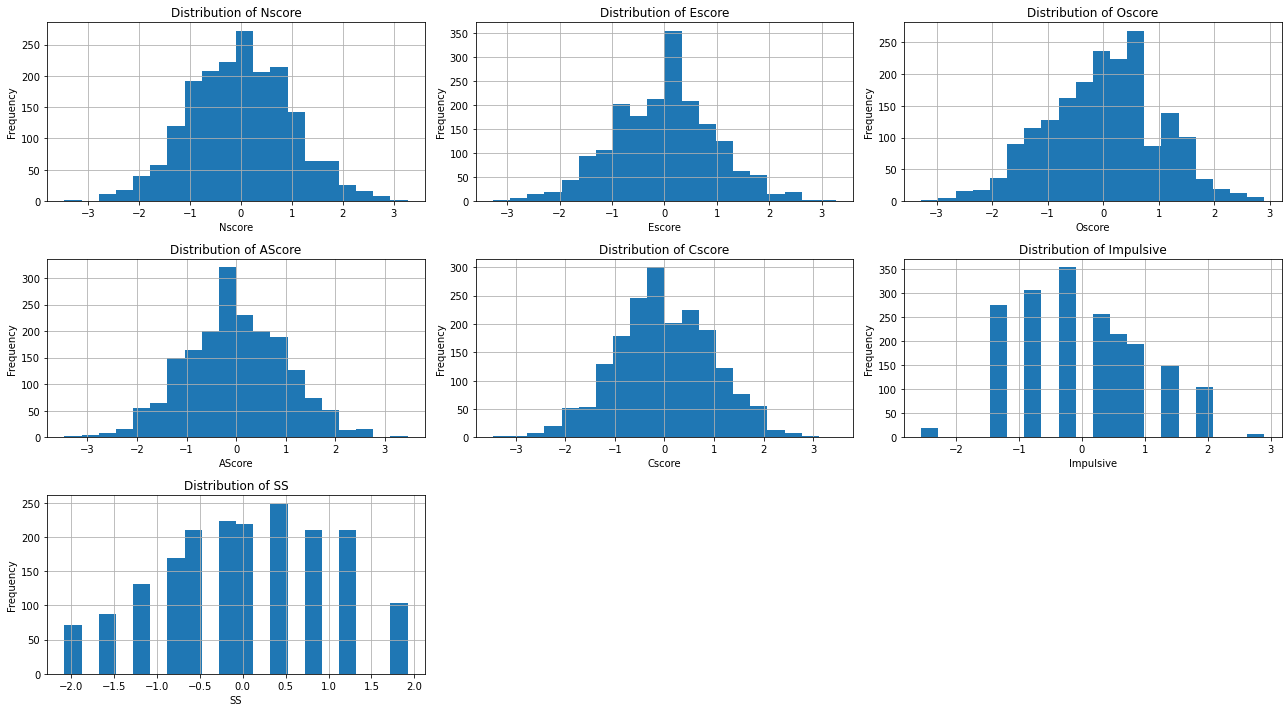

In [9]:
# Layout for the distribution
plt.figure(figsize=(18, 12))

# Distribution graphs
for i, drug in enumerate(illegal_drugs, start=1):
    plt.subplot(3, 3, i)
    data_relevant[drug].value_counts().plot(kind='bar', color=['blue', 'orange'])
    plt.title(f'Distribution of {drug} Usage')
    plt.xlabel('Usage')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Non-User', 'User'], rotation=0)

plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 12))

# Age Distribution
plt.subplot(3, 2, 1)
data_relevant['Age'].value_counts().plot(kind='bar')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Gender Distribution
plt.subplot(3, 2, 2)
data_relevant['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Education Distribution
plt.subplot(3, 2, 3)
data_relevant['Education'].value_counts().plot(kind='barh')
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')

# Country Distribution
plt.subplot(3, 2, 4)
data_relevant['Country'].value_counts().plot(kind='bar')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')

# Ethnicity Distribution
plt.subplot(3, 2, 5)
data_relevant['Ethnicity'].value_counts().plot(kind='barh')
plt.title('Ethnicity Distribution')
plt.xlabel('Count')
plt.ylabel('Ethnicity')

plt.tight_layout()
plt.show()

# Visualize the distributions of personality traits
plt.figure(figsize=(18, 10))
for i, trait in enumerate(personality_traits, start=1):
    plt.subplot(3, 3, i)
    data_relevant[trait].hist(bins=20)
    plt.title(f'Distribution of {trait}')
    plt.xlabel(trait)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Descriptive Statistics and Correlational Analysis

In [10]:
# Descriptive statistics for socio-demographics and personality traits
descriptive_stats = data_relevant.describe(include='all')

drug_usage_rates = data_relevant[illegal_drugs].mean().sort_values(ascending=False)

drug_usage_rates


Mushrooms    0.479299
Ecstasy      0.458599
LSD          0.433121
Meth         0.242038
VSA          0.228238
Ketamine     0.209660
Heroin       0.148620
dtype: float64

In [11]:
descriptive_stats

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Ecstasy,Heroin,Ketamine,LSD,Meth,Mushrooms,VSA
count,1884,1884,1884,1884,1884,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
unique,6,2,9,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,18-24,M,"Some college or university, no certificate or ...",UK,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,643,943,506,1043,1720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,-0.002667,0.458599,0.148620,0.209660,0.433121,0.242038,0.479299,0.228238
std,NaN,NaN,NaN,NaN,NaN,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.963575,0.498415,0.355808,0.407174,0.495639,0.428431,0.499704,0.419808
min,NaN,NaN,NaN,NaN,NaN,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000


In [12]:
#Correlation analysis between personality traits, socio-demographic factors, and illegal drug usage.
correlation_matrix = data_relevant[personality_traits + illegal_drugs].corr()

# Filter correlations of personality traits with drug usage
correlations_personality_drugs = correlation_matrix.loc[personality_traits, illegal_drugs]


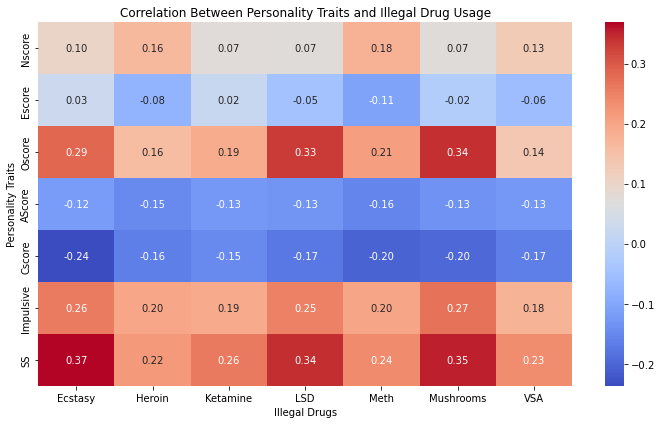

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the correlations between personality traits and illegal drugs
plt.figure(figsize=(10, 6))
sns.heatmap(correlations_personality_drugs, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Between Personality Traits and Illegal Drug Usage')
plt.xlabel('Illegal Drugs')
plt.ylabel('Personality Traits')
plt.tight_layout()
plt.show()


# Objective 2 

In [14]:
import statsmodels.api as sm

#Categorical variables into numeric representations
data_encoded = data_relevant.copy()

# Categorical variables using one-hot encoding for socio-demographics
data_encoded = pd.get_dummies(data_encoded, columns=socio_demographics, drop_first=True)


results = {}

for drug in illegal_drugs:
    # Define target (y) and predictors (X)
    X = data_encoded.drop(columns=illegal_drugs)  # Drop drug columns to use only predictors
    y = data_encoded[drug]

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit a logistic regression model using statsmodels for detailed output
    X_train_const = sm.add_constant(X_train)  # Add constant for intercept
    model = sm.Logit(y_train, X_train_const).fit()

    # Evaluate the model on test data
    X_test_const = sm.add_constant(X_test)  # Add constant for intercept in test data
    predictions = (model.predict(X_test_const) > 0.5).astype(int)
    report = classification_report(y_test, predictions, output_dict=True)

    # Store results for the current drug
    results[drug] = {
        "model_summary": model.summary(),
        "classification_report": report,
        "significant_predictors": model.pvalues[model.pvalues < 0.05].index.tolist(),
    }

# Extract and summarize significant predictors for all drugs
significant_predictors_summary = {drug: results[drug]["significant_predictors"] for drug in illegal_drugs}
significant_predictors_summary

Optimization terminated successfully.
         Current function value: 0.539028
         Iterations 7
         Current function value: 0.336729
         Iterations: 35
         Current function value: 0.430566
         Iterations: 35


C:\Users\ceedj\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ceedj\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ceedj\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.487570
         Iterations: 35
         Current function value: 0.409043
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.508257
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.464350
         Iterations 23


C:\Users\ceedj\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'Ecstasy': ['Oscore',
  'Cscore',
  'SS',
  'Age_45-54',
  'Age_55-64',
  'Gender_M',
  'Country_UK'],
 'Heroin': ['const',
  'Nscore',
  'Oscore',
  'AScore',
  'Age_25-34',
  'Age_35-44',
  'Age_45-54',
  'Gender_M',
  'Education_Left school before 16 years',
  'Country_UK'],
 'Ketamine': ['const',
  'Oscore',
  'SS',
  'Age_25-34',
  'Age_55-64',
  'Gender_M',
  'Country_Other',
  'Country_USA'],
 'LSD': ['Escore',
  'Oscore',
  'SS',
  'Age_25-34',
  'Age_35-44',
  'Age_45-54',
  'Age_55-64',
  'Gender_M',
  'Education_Left school before 16 years',
  'Country_UK'],
 'Meth': ['Nscore',
  'Oscore',
  'AScore',
  'Gender_M',
  'Education_Masters degree',
  'Education_University degree',
  'Country_USA'],
 'Mushrooms': ['Nscore',
  'Escore',
  'Oscore',
  'Cscore',
  'SS',
  'Age_25-34',
  'Age_35-44',
  'Age_45-54',
  'Gender_M',
  'Education_Left school at 17 years',
  'Country_Canada',
  'Country_UK',
  'Ethnicity_Black'],
 'VSA': ['Oscore',
  'SS',
  'Age_25-34',
  'Age_35-44',
  

In [15]:
import pandas as pd

# summary table for the predictors
summary_table = []

for drug, predictors in results.items():
    significant_predictors = predictors["significant_predictors"]
    for predictor in significant_predictors:
        summary_table.append({
            "Drug": drug,
            "Significant Predictor": predictor
        })

# To dataframe
summary_df = pd.DataFrame(summary_table)


print(summary_df)


       Drug        Significant Predictor
0   Ecstasy                       Oscore
1   Ecstasy                       Cscore
2   Ecstasy                           SS
3   Ecstasy                    Age_45-54
4   Ecstasy                    Age_55-64
..      ...                          ...
56      VSA                           SS
57      VSA                    Age_25-34
58      VSA                    Age_35-44
59      VSA  Country_Republic of Ireland
60      VSA              Ethnicity_Black

[61 rows x 2 columns]


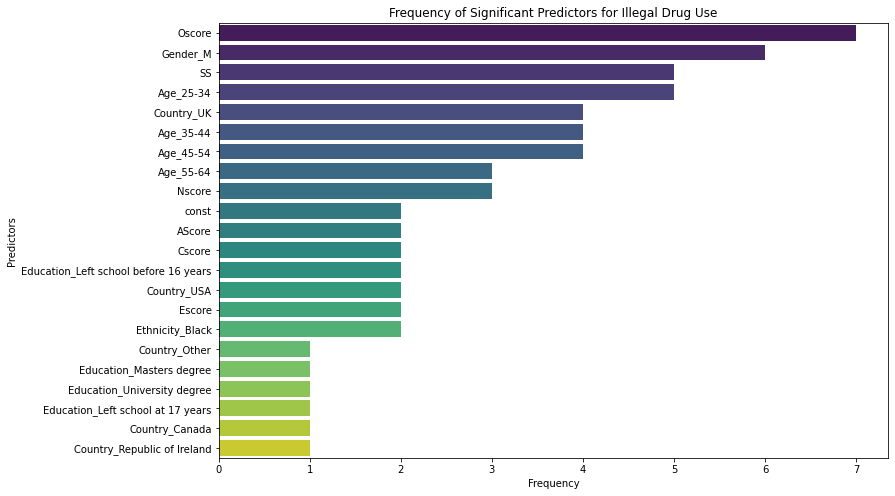

In [16]:
import seaborn as sns

predictor_counts = {}

# frequency of each predictor across all drugs
for drug, predictors in significant_predictors_summary.items():
    for predictor in predictors:
        predictor_counts[predictor] = predictor_counts.get(predictor, 0) + 1

# To dataFrame for visualization
predictor_df = pd.DataFrame(list(predictor_counts.items()), columns=['Predictor', 'Frequency'])
predictor_df = predictor_df.sort_values(by='Frequency', ascending=False)

#graph
plt.figure(figsize=(12, 8))
sns.barplot(data=predictor_df, x='Frequency', y='Predictor', palette="viridis")
plt.title('Frequency of Significant Predictors for Illegal Drug Use')
plt.xlabel('Frequency')
plt.ylabel('Predictors')
plt.show()


# Objective 3

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

socio_demographics = ['Age', 'Gender', 'Education']
personality_traits = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore']
illegal_drugs = ['Mushrooms', 'Ecstasy', 'LSD', 'Meth', 'VSA', 'Ketamine', 'Heroin']

data_encoded = pd.get_dummies(data, columns=socio_demographics, drop_first=True)

# Binary Classification Target: User vs. Non-user
data_encoded["User"] = data[illegal_drugs].apply(lambda row: any(val != 'CL0' for val in row), axis=1).astype(int)

# Features and targets
X = data_encoded[personality_traits]
y_binary = data_encoded["User"]

# Split data into train and test sets
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# SVM for Binary Classification
print("=== SVM Binary Classification ===")
svm_binary_model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
svm_binary_model.fit(X_train_binary, y_train_binary)
y_pred_svm_binary = svm_binary_model.predict(X_test_binary)
print(classification_report(y_test_binary, y_pred_svm_binary))



=== SVM Binary Classification ===
              precision    recall  f1-score   support

           0       0.74      0.49      0.59       203
           1       0.76      0.90      0.83       363

    accuracy                           0.76       566
   macro avg       0.75      0.70      0.71       566
weighted avg       0.75      0.76      0.74       566



In [18]:
# Multi-Class Classification Target: Frequency of Use
data_encoded["Frequency"] = data[illegal_drugs].apply(lambda row: sum(int(val[2]) for val in row if 'CL' in str(val)), axis=1)


frequency_max = data_encoded["Frequency"].max()
y_multiclass = pd.cut(
    data_encoded["Frequency"],
    bins=[-1, 0, 2, frequency_max],  # Ensure the bins cover all possible ranges
    labels=["Non-user", "Occasional", "Frequent"]
)

#Checking for NaN values
print("NaN values in y_multiclass before handling:", y_multiclass.isna().sum())
y_multiclass = y_multiclass.cat.add_categories(["Unknown"]).fillna("Unknown")
print("NaN values in y_multiclass after handling:", y_multiclass.isna().sum())


NaN values in y_multiclass before handling: 0
NaN values in y_multiclass after handling: 0


In [20]:
# Multi-Class Classification Target: Frequency of Use
data_encoded["Frequency"] = data[illegal_drugs].apply(
    lambda row: sum(int(val[2]) for val in row if 'CL' in str(val)), axis=1
)

frequency_max = data_encoded["Frequency"].max()
y_multiclass = pd.cut(
    data_encoded["Frequency"],
    bins=[-1, 0, 2, frequency_max],  # Ensure bins cover all possible ranges
    labels=["Non-user", "Occasional", "Frequent"]
)

# NaN values to "Unknown" after filtering
y_multiclass = y_multiclass.cat.add_categories(["Unknown"]).fillna("Unknown")

# Features and targets
X = data_encoded[personality_traits]
y_binary = data_encoded["User"]

# Split data into train and test sets
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.3, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multiclass, test_size=0.3, random_state=42)

y_train_multi = y_train_multi.fillna("Unknown")
y_test_multi = y_test_multi.fillna("Unknown")

# SVM for Multi-Class Classification
print("\n=== SVM Multi-Class Classification ===")
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm_multi_model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
svm_multi_model.fit(X_train_multi, y_train_multi)
y_pred_svm_multi = svm_multi_model.predict(X_test_multi)

# Evaluate SVM Multi-Class Model
from sklearn.metrics import classification_report
print(classification_report(y_test_multi, y_pred_svm_multi))
socio_demographics = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
personality_traits = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
illegal_drugs = ['Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Mushrooms', 'VSA']




=== SVM Multi-Class Classification ===
              precision    recall  f1-score   support

    Frequent       0.71      0.90      0.79       307
    Non-user       0.72      0.63      0.67       203
  Occasional       0.00      0.00      0.00        56

    accuracy                           0.71       566
   macro avg       0.48      0.51      0.49       566
weighted avg       0.64      0.71      0.67       566



C:\Users\ceedj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ceedj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ceedj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


socio_demographics = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
personality_traits = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
illegal_drugs = ['Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Mushrooms', 'VSA']

data_relevant = data[socio_demographics + personality_traits + illegal_drugs].copy()
for drug in illegal_drugs:
    data_relevant[drug] = data_relevant[drug].apply(lambda x: 0 if x == 'CL0' else 1)


data_encoded = pd.get_dummies(data_relevant, columns=socio_demographics, drop_first=True)

# Use most significant predictors from earlier analysis
significant_personality = ["SS", "Oscore"]
significant_demographics = ["Age_45-54", "Gender_M"]
selected_features = significant_personality + significant_demographics

X = data_encoded[selected_features]
y = data_encoded[illegal_drugs].max(axis=1)  # Binary target: 1 if user of any illegal drug, else 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Non-User', 'User'])

# Evaluations
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
evaluation_metrics, report


({'Accuracy': 0.6996466431095406,
  'Precision': 0.7493540051679587,
  'Recall': 0.7988980716253443,
  'F1 Score': 0.7733333333333333},
 '              precision    recall  f1-score   support\n\n    Non-User       0.59      0.52      0.55       203\n        User       0.75      0.80      0.77       363\n\n    accuracy                           0.70       566\n   macro avg       0.67      0.66      0.66       566\nweighted avg       0.69      0.70      0.70       566\n')

In [22]:
evaluation_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [accuracy, precision, recall, f1],
}

# datamframe
evaluation_df = pd.DataFrame(evaluation_data)

evaluation_df

,Metric,Value
0,Accuracy,0.699647
1,Precision,0.749354
2,Recall,0.798898
3,F1 Score,0.773333


In [23]:
import re

# Raw classification report string from the results
report_string = """
              precision    recall  f1-score   support

    Non-User       0.59      0.52      0.55       203
        User       0.75      0.80      0.77       363

    accuracy                           0.70       566
   macro avg       0.67      0.66      0.66       566
weighted avg       0.69      0.70      0.70       566
"""

report_rows = re.findall(r'(\S+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(\d+)', report_string)

#Data Frame
report_df = pd.DataFrame(report_rows, columns=["Class", "Precision", "Recall", "F1-Score", "Support"])


report_df["Precision"] = report_df["Precision"].astype(float)
report_df["Recall"] = report_df["Recall"].astype(float)
report_df["F1-Score"] = report_df["F1-Score"].astype(float)
report_df["Support"] = report_df["Support"].astype(int)

# Add accuracy manually to the DataFrame
report_df.loc[len(report_df)] = ["Accuracy", None, None, 0.70, 566]

report_df

,Class,Precision,Recall,F1-Score,Support
0,Non-User,0.59,0.52,0.55,203
1,User,0.75,0.8,0.77,363
2,avg,0.67,0.66,0.66,566
3,avg,0.69,0.7,0.70,566
4,Accuracy,None,None,0.70,566


In [24]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [26]:

socio_demographics = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
personality_traits = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
illegal_drugs = ['Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Mushrooms', 'VSA']

data_relevant = data[socio_demographics + personality_traits + illegal_drugs].copy()
for drug in illegal_drugs:
    data_relevant[drug] = data_relevant[drug].apply(lambda x: 0 if x == 'CL0' else 1)

data_encoded = pd.get_dummies(data_relevant, columns=socio_demographics, drop_first=True)

significant_personality = ["SS", "Oscore"]
significant_demographics = ["Age_45-54", "Gender_M"]
selected_features = significant_personality + significant_demographics

X = data_encoded[selected_features]
y = data_encoded[illegal_drugs].max(axis=1)  # Binary target: 1 if user of any illegal drug, else 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [27]:
# parameters for XGBoost
params = {
    'max_depth': 3,  # depth of each tree
    'eta': 0.1,      # the training step for each iteration
    'objective': 'binary:logistic',  # binary classification 
    'eval_metric': 'logloss',  # evaluation metric
    'seed': 42       # for reproducibility
}
num_boost_round = 300  # number of boosting rounds

# Train the model
bst = xgb.train(params, dtrain, num_boost_round, evals=[(dtest, 'eval')], early_stopping_rounds=10)



[0]	eval-logloss:0.63120
[1]	eval-logloss:0.61473
[2]	eval-logloss:0.60017
[3]	eval-logloss:0.58860
[4]	eval-logloss:0.57939
[5]	eval-logloss:0.57029
[6]	eval-logloss:0.56314
[7]	eval-logloss:0.55670
[8]	eval-logloss:0.55049
[9]	eval-logloss:0.54545
[10]	eval-logloss:0.54193
[11]	eval-logloss:0.53783
[12]	eval-logloss:0.53464
[13]	eval-logloss:0.53204
[14]	eval-logloss:0.52929
[15]	eval-logloss:0.52644
[16]	eval-logloss:0.52382
[17]	eval-logloss:0.52098
[18]	eval-logloss:0.51939
[19]	eval-logloss:0.51772
[20]	eval-logloss:0.51613
[21]	eval-logloss:0.51481
[22]	eval-logloss:0.51399
[23]	eval-logloss:0.51301
[24]	eval-logloss:0.51223
[25]	eval-logloss:0.51138
[26]	eval-logloss:0.51039
[27]	eval-logloss:0.51024
[28]	eval-logloss:0.50951
[29]	eval-logloss:0.50888
[30]	eval-logloss:0.50829
[31]	eval-logloss:0.50780
[32]	eval-logloss:0.50745
[33]	eval-logloss:0.50712
[34]	eval-logloss:0.50693
[35]	eval-logloss:0.50676
[36]	eval-logloss:0.50655
[37]	eval-logloss:0.50610
[38]	eval-logloss:0.50

In [28]:
# Making predictions
y_pred_prob = bst.predict(dtest)  # These are probabilities
y_pred = [1 if i > 0.5 else 0 for i in y_pred_prob]  # Convert probabilities to 0 or 1

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Non-User', 'User'])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", report)


Accuracy: 0.765017667844523
Precision: 0.7875
Recall: 0.8677685950413223
F1 Score: 0.8256880733944953
Classification Report:
               precision    recall  f1-score   support

    Non-User       0.71      0.58      0.64       203
        User       0.79      0.87      0.83       363

    accuracy                           0.77       566
   macro avg       0.75      0.72      0.73       566
weighted avg       0.76      0.77      0.76       566



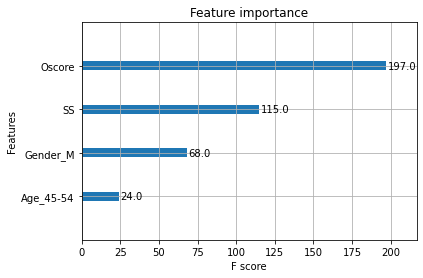

In [29]:
xgb.plot_importance(bst)
import matplotlib.pyplot as plt
plt.show()
#Feature Importance